In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


Started
by
initializing
all
imports

In [4]:
corn_yields = pd.read_csv('Data/CornCropYieldsCentralIL.csv')

Initiated data processing on the initial CSV export from the NASS Agriculture database, covering Central Illinois corn yield records for the period 2000–2025.

In [5]:
corn_yields.head()
corn_yields.columns

Index(['Program', 'YEAR', 'Period', 'Week Ending', 'Geo Level', 'State',
       'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed',
       'Commodity', 'Data Item', 'Domain', 'Domain Category', 'YIELD',
       'CV (%)'],
      dtype='object')

Finished inspecting the data for corn yields and features utilizing pandas for data manipulation

In [6]:
precipitation_avg = pd.read_csv("Data/PrecipitationAverage.csv")
precipitation_avg

,PARAMETER,YEAR,LAT,LON,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,PRECTOTCORR,2000,39.5,-88.125,1.06,2.29,1.55,2.44,3.41,5.84,4.24,4.06,3.76,2.90,3.16,1.48,3.01
1,PRECTOTCORR,2000,39.5,-88.750,1.00,2.00,1.57,2.25,3.39,5.90,4.09,3.76,3.51,2.81,3.16,1.38,2.90
2,PRECTOTCORR,2000,39.5,-89.375,0.97,1.79,1.70,2.04,3.38,5.71,3.70,3.42,3.11,2.60,2.84,1.37,2.72
3,PRECTOTCORR,2000,39.5,-90.000,0.75,1.70,1.75,1.85,3.33,6.16,3.84,2.94,2.66,2.44,2.38,1.21,2.58
4,PRECTOTCORR,2000,40.0,-88.125,1.10,2.03,1.49,2.36,3.35,5.23,3.10,3.26,3.32,2.29,2.99,1.51,2.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,PRECTOTCORR,2024,40.5,-90.000,2.85,0.30,2.57,4.93,2.52,1.95,5.50,2.67,0.64,1.04,3.22,1.63,2.49
396,PRECTOTCORR,2024,41.0,-88.125,3.41,0.48,3.21,4.63,3.53,2.74,4.35,2.62,0.98,0.66,2.83,1.97,2.63
397,PRECTOTCORR,2024,41.0,-88.750,3.30,0.45,3.21,4.65,3.58,2.77,4.11,2.63,0.85,0.69,2.94,1.93,2.60
398,PRECTOTCORR,2024,41.0,-89.375,3.08,0.34,3.14,4.61,2.92,2.76,4.32,2.34,0.52,0.73,2.75,1.53,2.43


In [7]:
precipitation_avg.columns

Index(['PARAMETER', 'YEAR', 'LAT', 'LON', 'JAN', 'FEB', 'MAR', 'APR', 'MAY',
       'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANN'],
      dtype='object')

In [8]:
precipitation_avg.shape

(400, 17)

Completed inspection of the precipitation average chart from the NASA POWER database. Determined the need to focus on corn-growing months and compute their mean precipitation to populate the average_precipitation column.

In [9]:
corn_months = ['MAY', 'JUN', 'JUL', 'AUG']

corn_avg_by_year = (
    precipitation_avg
    .groupby('YEAR')[corn_months]
    .mean()  # average for each month within the year
    .assign(AVG_PRECIPITATION=lambda df: df.mean(axis=1))  # mean across months
    .reset_index()
)

Calculated annual mean precipitation by grouping monthly data by year, applying the mean function, and assigning the result to the AVG_PRECIPITATION column.

In [10]:
corn_avg_by_year

,YEAR,MAY,JUN,JUL,AUG,AVG_PRECIPITATION
0,2000,3.385000,4.983750,3.331250,2.626875,3.581719
1,2001,3.488125,3.054375,2.812500,3.259375,3.153594
2,2002,5.867500,3.481875,2.454375,3.774375,3.894531
3,2003,3.650625,3.070625,4.817500,3.318750,3.714375
4,2004,5.033750,2.633125,3.278125,4.113750,3.764687
5,2005,1.255625,1.502500,2.625000,2.482500,1.966406
6,2006,2.439375,2.052500,3.439375,3.443125,2.843594
7,2007,1.907500,3.511875,2.867500,3.376250,2.915781
8,2008,4.134375,5.239375,5.213125,1.538750,4.031406
9,2009,4.411875,4.460000,3.636250,3.840625,4.087187


In [11]:
corn_yields.columns

Index(['Program', 'YEAR', 'Period', 'Week Ending', 'Geo Level', 'State',
       'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed',
       'Commodity', 'Data Item', 'Domain', 'Domain Category', 'YIELD',
       'CV (%)'],
      dtype='object')

In [12]:
to_pop = ['Program', 'Period', 'Week Ending', 'Geo Level', 'State',
          'State ANSI', 'Ag District', 'Ag District Code', 'County',
          'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed',
          'Commodity', 'Data Item', 'Domain', 'Domain Category', 'CV (%)']
for pop in to_pop:
    corn_yields.pop(pop)

Removed all unnecessary fields from the corn_yield DataFrame to retain only the relevant features for model training.

In [13]:
corn_yields = corn_yields.merge(
    corn_avg_by_year[['YEAR', 'AVG_PRECIPITATION']],
    on='YEAR',
    how='left'
)

In [14]:
corn_yields

,YEAR,YIELD,AVG_PRECIPITATION
0,2024,234.5,3.265469
1,2024,243.8,3.265469
2,2024,246.7,3.265469
3,2024,241.7,3.265469
4,2024,218.4,3.265469
...,...,...,...
261,2000,166.0,3.581719
262,2000,151.0,3.581719
263,2000,154.0,3.581719
264,2000,165.0,3.581719


Merged AVG_PRECIPITATION values into rows sharing the same year in corn_yield, aligning precipitation data with corresponding yield records for proper organization.

In [15]:
temp_data = pd.read_csv('Data/TempAtTwoMeters.csv')

Repeated the same process for AVG_TEMPERATURE and AVG_WETNESS, both retrieved from the NASA POWER database, to align these metrics with corresponding corn yield records.

In [16]:
corn_months = ['MAY', 'JUN', 'JUL', 'AUG']

temp_avg = (
    temp_data
    .groupby('YEAR')[corn_months]
    .mean()  # average per month within year
    .assign(AVG_TEMPERATURE=lambda df: df.mean(axis=1))  # mean across selected months
    .reset_index()
)
corn_yields = corn_yields.merge(
    temp_avg[['YEAR', 'AVG_TEMPERATURE']],
    on='YEAR',
    how='left'
)

# Calculated average surface wetness for May–August and merged into corn_yields
surface_wetness_data = pd.read_csv('Data/SurfaceWetness.csv')

wetness_avg = (
    surface_wetness_data
    .groupby('YEAR')[corn_months]
    .mean()
    .assign(AVG_WETNESS=lambda df: df.mean(axis=1))
    .reset_index()
)
corn_yields = corn_yields.merge(
    wetness_avg[['YEAR', 'AVG_WETNESS']],
    on='YEAR',
    how='left'
)

In [17]:
corn_yields.pop('YEAR')
corn_yields.columns


Index(['YIELD', 'AVG_PRECIPITATION', 'AVG_TEMPERATURE', 'AVG_WETNESS'], dtype='object')

Removed YEAR column after merging and displayed final column names

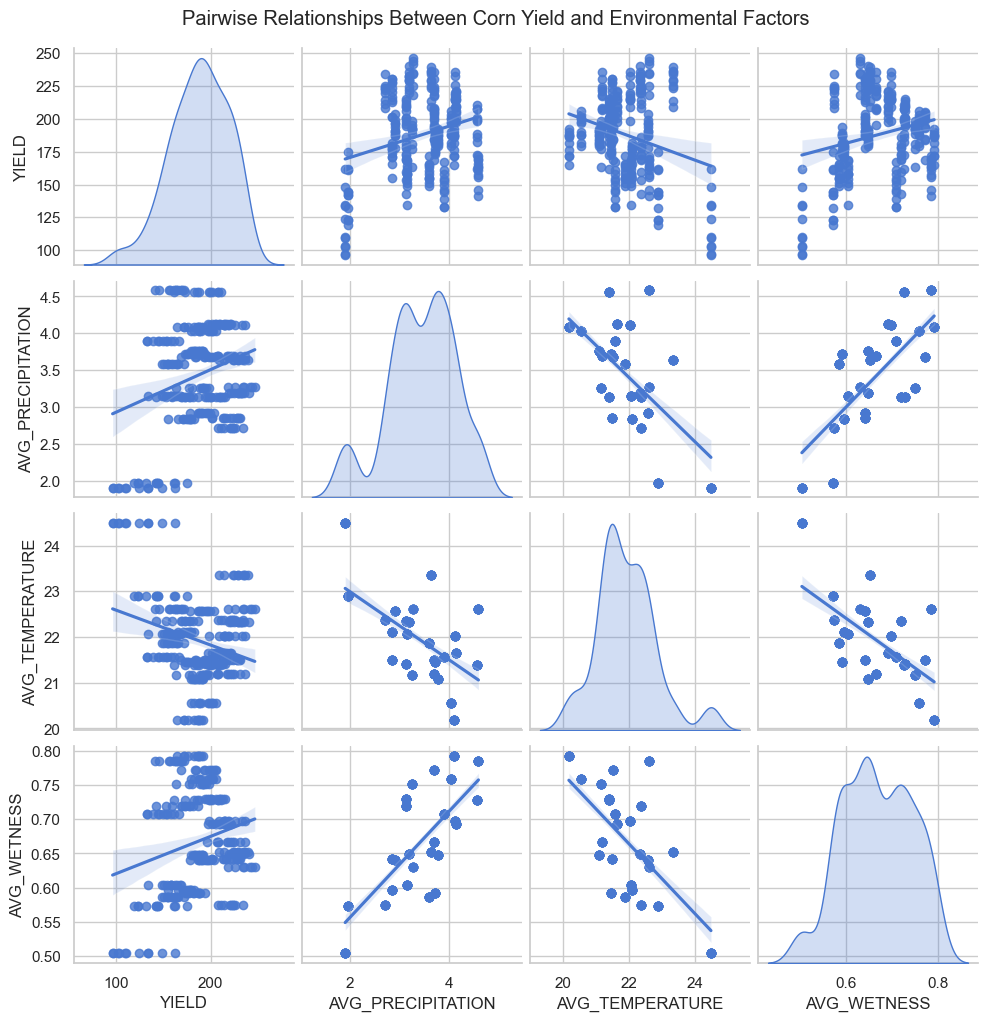

In [24]:
# Set a clean aesthetic
sns.set_theme(style="whitegrid", palette="muted")

# ## 1. Pairplot to visualize relationships between all features
sns.pairplot(corn_yields, kind='reg', diag_kind='kde')
plt.suptitle("Pairwise Relationships Between Corn Yield and Environmental Factors", y=1.02)
plt.show()

From analyzing the graphs above it seems that corn yields are not too strongly correlated with the features selected

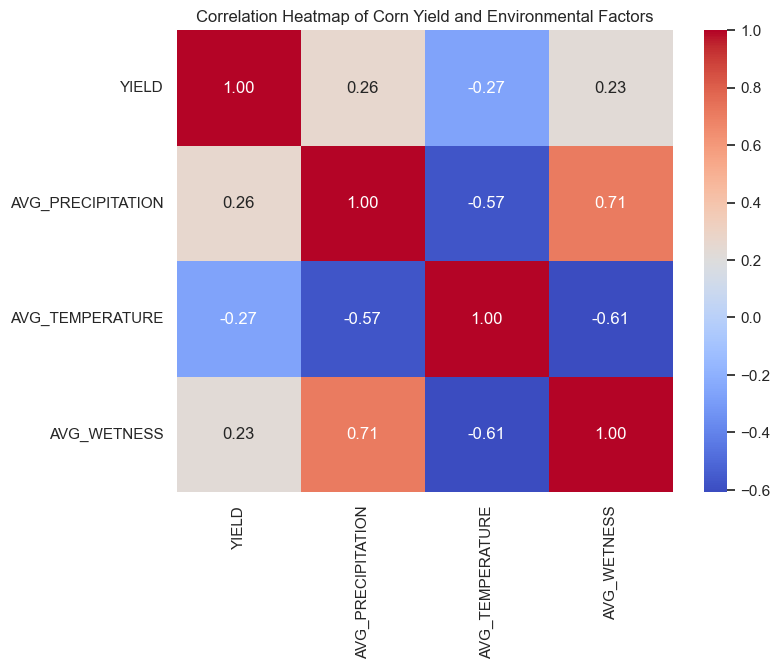

In [25]:
# ## 2. Correlation heatmap
plt.figure(figsize=(8,6))
corr = corn_yields.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Corn Yield and Environmental Factors")
plt.show()

From analyzing the heatmap as well it seems that there is not really any correlation between yield and these features

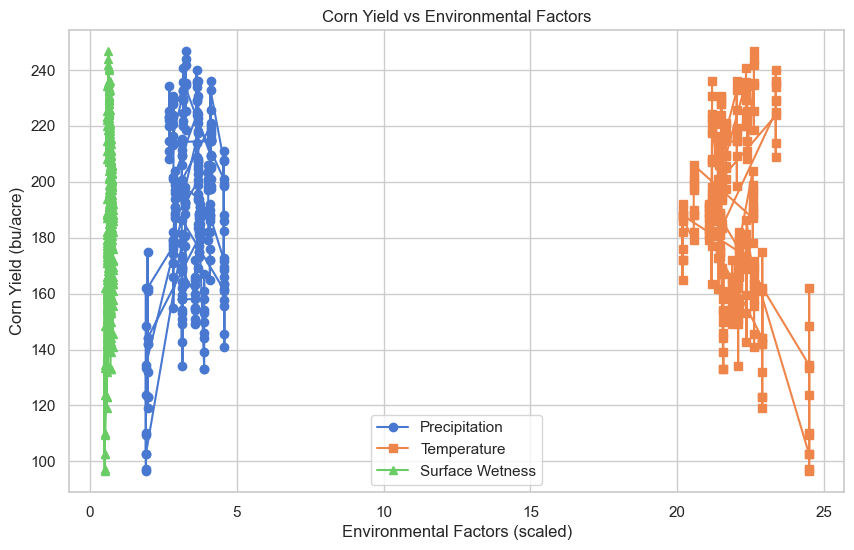

In [26]:
# ## 3. Multi-line trend plot for each environmental factor vs YIELD
plt.figure(figsize=(10,6))
plt.plot(corn_yields['AVG_PRECIPITATION'], corn_yields['YIELD'], 'o-', label='Precipitation')
plt.plot(corn_yields['AVG_TEMPERATURE'], corn_yields['YIELD'], 's-', label='Temperature')
plt.plot(corn_yields['AVG_WETNESS'], corn_yields['YIELD'], '^-', label='Surface Wetness')
plt.xlabel("Environmental Factors (scaled)")
plt.ylabel("Corn Yield (bu/acre)")
plt.title("Corn Yield vs Environmental Factors")
plt.legend()
plt.show()

This graph really does not point to anything significant between the features

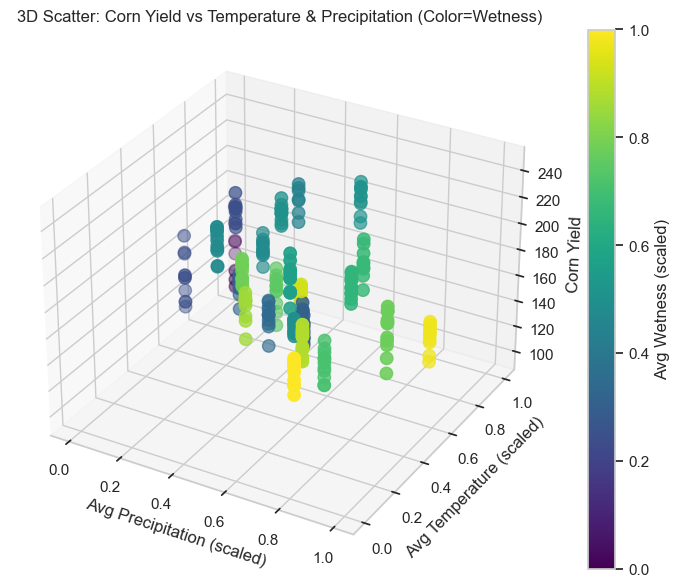

In [27]:
# ## 4. 3D scatter plot for YIELD vs TEMP and PRECIPITATION
from mpl_toolkits.mplot3d import Axes3D
# Scale features for better visualization
scaler = MinMaxScaler()
scaled = scaler.fit_transform(corn_yields[['AVG_PRECIPITATION', 'AVG_TEMPERATURE', 'AVG_WETNESS']])
corn_scaled = pd.DataFrame(scaled, columns=['AVG_PRECIPITATION', 'AVG_TEMPERATURE', 'AVG_WETNESS'])
corn_scaled['YIELD'] = corn_yields['YIELD']

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(
    corn_scaled['AVG_PRECIPITATION'],
    corn_scaled['AVG_TEMPERATURE'],
    corn_scaled['YIELD'],
    c=corn_scaled['AVG_WETNESS'], cmap='viridis', s=80
)
ax.set_xlabel('Avg Precipitation (scaled)')
ax.set_ylabel('Avg Temperature (scaled)')
ax.set_zlabel('Corn Yield')
fig.colorbar(p, label='Avg Wetness (scaled)')
plt.title("3D Scatter: Corn Yield vs Temperature & Precipitation (Color=Wetness)")
plt.show()

All these graphs show that the features are not strongly correlated with corn yields, but we will test out different ML models to see if models could make accurate predictions based on th egiven features still

In [18]:
corn_yields.to_csv('Processed_Data/corn_yields_processed.csv', index=False)